In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2Z0MTQ5NjgvUmVwb3MvaW50cm8tY29kaW5nLWRhdGEtYW5hbHlzaXMvcXVhcnRvLzEw'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap.py": 1716061061.963526, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap_external.py": 1716061061.9664707, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/zipimport.py": 1716061059.8541, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/codecs.py": 1716061059.3098388, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/aliases.py": 1716061060.5232508, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/__init__.py": 1716061060.520605, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/utf_8.py": 1716061061.3768034, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/abc.py": 1716061059.2254992, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/io.py": 1716061059.4591994, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/stat.py": 1716061059.7052634, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/_collections_abc.py": 17160

In [2]:
from numpy import random

rng = random.default_rng(seed=24)

In [3]:
import numpy as np

shape = (3,3)
array1 = rng.random(shape)
print(array1.shape)
print(array1)

(3, 3)
[[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]
 [0.87411653 0.08643046 0.74247527]]


In [4]:
print(array1[1, 2])

0.5696873105084019


In [5]:
print(array1[:2])
print(array1[2:])

[[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]]
[[0.87411653 0.08643046 0.74247527]]


In [6]:
print(array1[0,:])

[0.33026884 0.40517732 0.57473782]


In [7]:
print(array1[:,0])

[0.33026884 0.50639977 0.87411653]


In [8]:
array_of_zeros = np.zeros(shape=(2, 3)) # 2 rows, 3 columns

In [9]:
np.ones_like(array_of_zeros)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [10]:
rng = random.default_rng(seed=24)
random_matrix = rng.uniform(-1,1,size=(2,5)) # random floats between -1 and 1, 2 rows, 5 columns
random_matrix

array([[-0.33946233, -0.18964537,  0.14947564,  0.01279953,  0.12842501],
       [ 0.13937462,  0.74823306, -0.82713908,  0.48495054,  0.64073453]])

In [11]:
random_matrix.ndim # two dimensions, rank 2, a matrix

2

In [12]:
random_tensor = rng.integers(0,3,size=(2,3,4)) # random integes in [0,3), 2x3x4 tensor
random_tensor

array([[[0, 2, 1, 1],
        [2, 2, 0, 0],
        [1, 2, 0, 1]],

       [[2, 0, 1, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 1]]])

In [13]:
random_tensor.ndim

3

In [14]:
small_matrix = rng.integers(0,2,size=(3,2)) 
small_matrix

array([[1, 1],
       [1, 0],
       [1, 0]])

In [15]:
small_matrix.sum(axis=0) # sum along the first axis (rows)

array([3, 1])

In [16]:
small_matrix.sum(axis=1) # sum along the second axis (columns), can you explain the resulting shape?

array([2, 1, 1])

In [17]:
np.mean(small_matrix, axis=0) # mean along the first axis (rows)

array([1.        , 0.33333333])

In [18]:
small_matrix[:, 0] # all rows, first column

array([1, 1, 1])

In [19]:
small_matrix[:2,:] # first two rows, all columns

array([[1, 1],
       [1, 0]])

In [20]:
small_matrix[::-1,:1]

array([[1],
       [1],
       [1]])

In [21]:
selection = small_matrix[::-1,:1]

print("shape", selection.shape)
print("rank", selection.ndim)

shape (3, 1)
rank 2


In [22]:
selection = small_matrix[::-1,:1]
reshaped_selection = selection.reshape((3,))  # reshape to a 1D array excplicitly
print("reshaped shape", reshaped_selection.shape)
print("reshaped rank", reshaped_selection.ndim)
print("reshaped selection", reshaped_selection)

reshaped shape (3,)
reshaped rank 1
reshaped selection [1 1 1]


In [23]:
#same code as above, but with inferred shape
selection = small_matrix[::-1,:1]
reshaped_selection = selection.reshape(-1)  # infererd shape
print("reshaped shape", reshaped_selection.shape)
print("reshaped rank", reshaped_selection.ndim)
print("reshaped selection", reshaped_selection)

reshaped shape (3,)
reshaped rank 1
reshaped selection [1 1 1]


In [24]:
a_matrix = rng.integers(0,10,size=(2,3)) # random integers in [0,10), 2x3 matrix
print("Original matrix:\n", a_matrix)
ravelled_view = a_matrix.ravel()
print("Flattened view:", ravelled_view)  # flatten the array to a 1D array

Original matrix:
 [[4 7 8]
 [7 7 0]]
Flattened view: [4 7 8 7 7 0]


In [25]:
ravelled_view[0] = 100  # modify the view
print("Modified view:", ravelled_view)  # the view is modified
print("Original array:", a_matrix)  # the original array is modified as well

Modified view: [100   7   8   7   7   0]
Original array: [[100   7   8]
 [  7   7   0]]


In [26]:
a_matrix = rng.integers(0,10,size=(2,3)) # random integers in [0,10), 2x3 matrix
print("The original:\n",a_matrix)
flattened_copy = a_matrix.flatten()
print("Flattened:",flattened_copy)  # flatten the array to a 1D array
flattened_copy[0] = 100  # modify the copy
print("Flattened after modification:",flattened_copy)  # the copy is modified
print("The original:\n",a_matrix)  # the original array is not modified

The original:
 [[4 4 7]
 [4 6 9]]
Flattened: [4 4 7 4 6 9]
Flattened after modification: [100   4   7   4   6   9]
The original:
 [[4 4 7]
 [4 6 9]]


In [27]:
one_dimensional_array = rng.integers(0,10,size=(5,))  # random integers in [0,10), 1D array
print("One-dimensional array:", one_dimensional_array)
reshaped_array = one_dimensional_array.reshape((5,1))  # reshape to a  2D array with one column
print("Reshaped array:\n", reshaped_array)

One-dimensional array: [5 5 5 3 2]
Reshaped array:
 [[5]
 [5]
 [5]
 [3]
 [2]]


In [28]:
# Minimal broadcasting example: rank 2 (matrix) with rank 1 (vector)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
vector = np.array([10, 20, 30])

# Broadcasting addition: vector is added to each row of the matrix
result = matrix + vector
print("Matrix:\n", matrix)
print("Vector:", vector)
print("Result of broadcasting:\n", result)

Matrix:
 [[1 2 3]
 [4 5 6]]
Vector: [10 20 30]
Result of broadcasting:
 [[11 22 33]
 [14 25 36]]


In [29]:
one_dimensional_array = np.linspace(1, 5, num=5)  # create a 1D array with 5 elements
print("One-dimensional array:", one_dimensional_array)
# Expand one_dimensional_array to a table with 5 rows and 5 columns
row_vector = one_dimensional_array.reshape(1, -1)  # shape (1, 5)
column_vector = one_dimensional_array.reshape(-1, 1)  # shape (5, 1)

# Broadcasting to create a table
table = column_vector + row_vector
print("BroadcastedTable:\n",table)

One-dimensional array: [1. 2. 3. 4. 5.]
BroadcastedTable:
 [[ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]]


In [30]:
A = np.array([[2, 3,1], [4, -1,0],[0,2,1]])
b = np.array([[5], [1], [3]]) # we use double brackets to create a column vector
print("Matrix A:\n", A)
print("Vector b:\n", b)

Matrix A:
 [[ 2  3  1]
 [ 4 -1  0]
 [ 0  2  1]]
Vector b:
 [[5]
 [1]
 [3]]


In [31]:
x = np.linalg.solve(A, b)

x

array([[0.5],
       [1. ],
       [1. ]])

In [32]:
A @ x

array([[5.],
       [1.],
       [3.]])

In [33]:
x = np.linalg.inv(A) @ b

x

array([[0.5],
       [1. ],
       [1. ]])

In [34]:
b.T

array([[5, 1, 3]])

In [35]:
np.dot(b.T,b)

array([[35]])

In [36]:
np.cross(b.T, b.T) #takes row vectors and returns a row vector

array([[0, 0, 0]])

[[ 2  3  1]
 [ 4 -1  0]
 [ 0  2  1]]


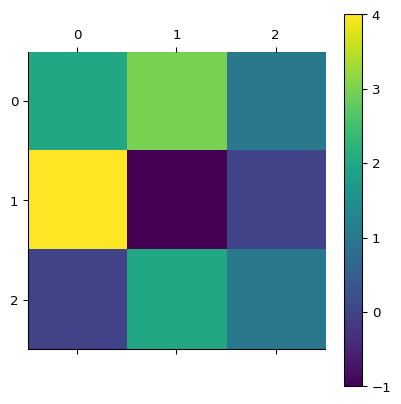

In [37]:
import matplotlib.pyplot as plt
plt.matshow(A)
plt.colorbar()
print(A)

In [38]:
row_index, col_index = np.indices(A.shape)
print("Row indices:\n", row_index)
print("Column indices:\n", col_index)

Row indices:
 [[0 0 0]
 [1 1 1]
 [2 2 2]]
Column indices:
 [[0 1 2]
 [0 1 2]
 [0 1 2]]


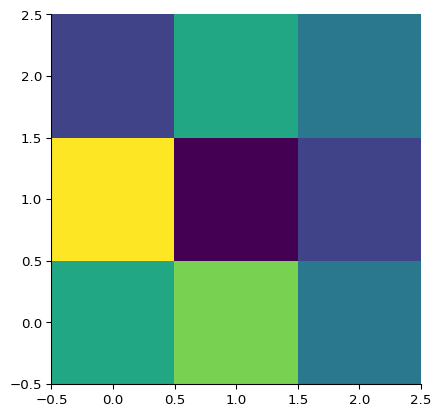

In [39]:
plt.imshow(A, origin='lower')  # origin='lower' to set the origin at the bottom left

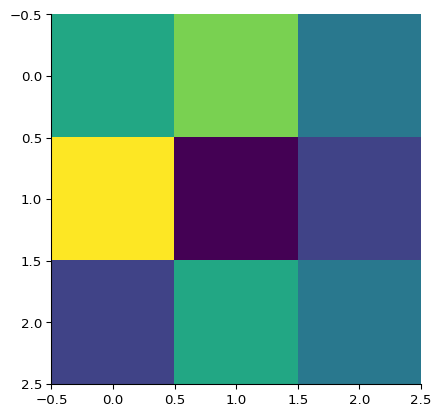

In [40]:
plt.imshow(A, origin='upper')  # origin="upper" to set the origin at the top left

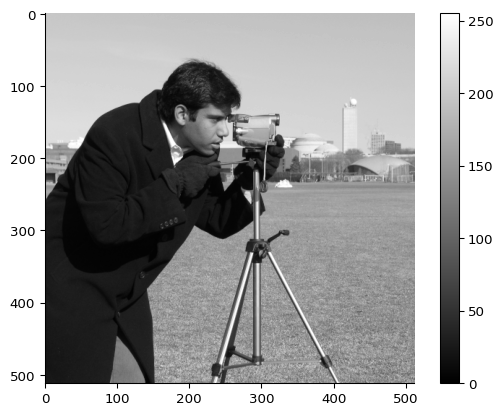

In [41]:
from skimage import data # importing images from a popular image library

image = data.camera() # a grayscale image

plt.imshow(image, cmap='gray')  # display the image in grayscale
plt.colorbar()

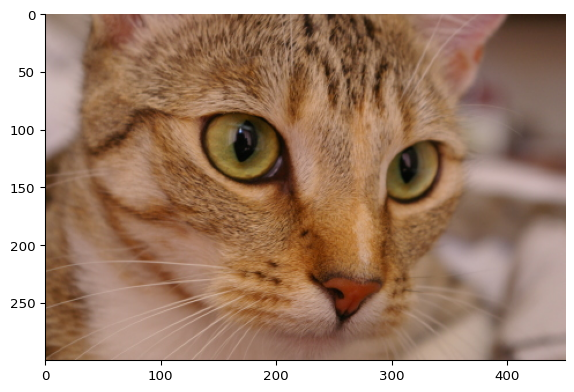

In [42]:
color_image = data.chelsea()
plt.imshow(color_image)  # display the color image

In [43]:
color_image.shape

(300, 451, 3)

Text(0.5, 1.0, 'Blue Channel')

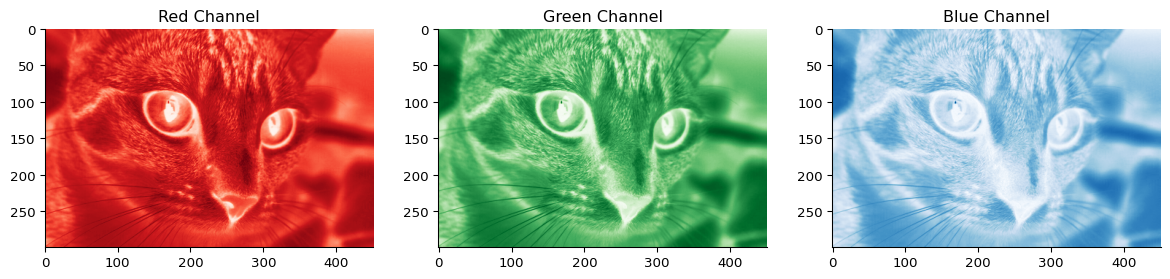

In [44]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))  # create a figure with 3 subplots
ax[0].imshow(color_image[:, :, 0], cmap='Reds')  # display the red channel
ax[0].set_title('Red Channel')
ax[1].imshow(color_image[:, :, 1], cmap='Greens')  # display the green channel
ax[1].set_title('Green Channel')
ax[2].imshow(color_image[:, :, 2], cmap='Blues')  # display the blue channel
ax[2].set_title('Blue Channel')

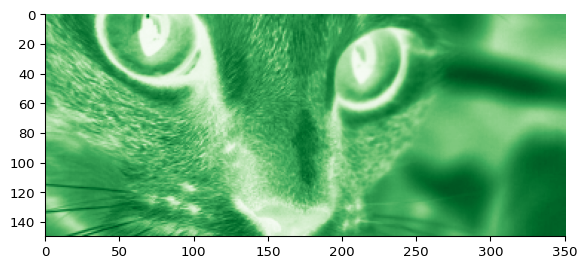

In [45]:
plt.imshow(color_image[100:250, 100:, 1], cmap='Greens')  # display the green channel

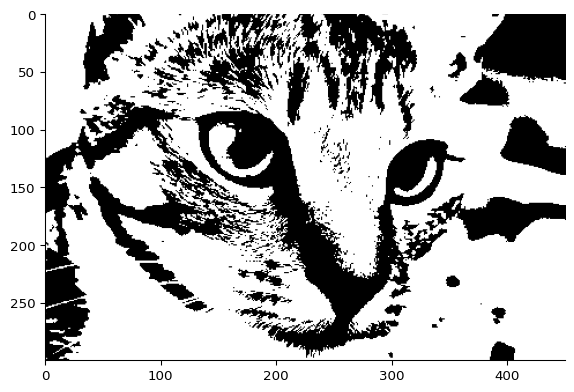

In [46]:
green = color_image[:,:,1]

plt.imshow(green>100, cmap='gray')  # display a binary image where pixels with green channel value > 100 are white

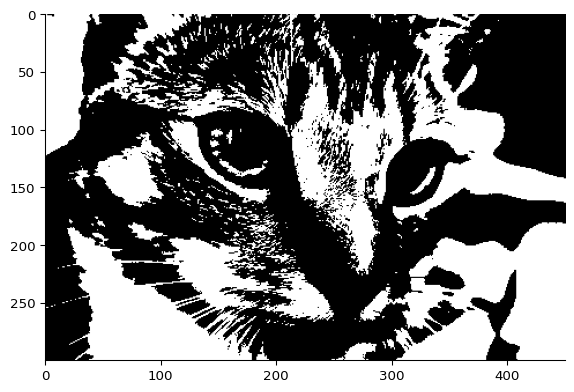

In [47]:
green = color_image[:,:,1]
red = color_image[:,:,0]
plt.imshow( (green>120) & (red>120) , cmap='gray')

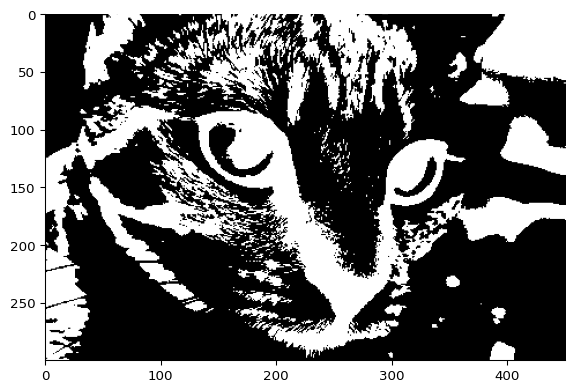

In [48]:
plt.imshow(np.logical_not(green>100), cmap='gray')